In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gmaps
from datetime import datetime
from api_keys import gkey

## Exploration of Data

In [2]:
# Read csv file with taxi ride random sample and create DataFrame
taxi_file = "Resources/DataWithHeaders.csv"
df_taxi = pd.read_csv(taxi_file, index_col=0)
df_taxi.head()

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,07a82232d832859a7dcb1c40846bb3e21acb2c84755ef6...,11/16/2013 01:45:00 AM,11/16/2013 01:45:00 AM,480.0,0.15,1.703108e+10,1.703108e+10,8.0,8.0,...,8.05,Cash,NaN,41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37.0
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,74605d6aa0c8ba08190a5824f79ef27172c59671b00582...,09/28/2016 04:45:00 PM,09/28/2016 04:45:00 PM,420.0,0.00,1.703184e+10,1.703132e+10,32.0,32.0,...,8.75,Credit Card,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),38.0
2,c2155aedc41a27673cd498d0fea754a18132d7f9,4243ab34318764eb5ca51054af503c610b50579594cef6...,12/10/2013 07:15:00 AM,12/10/2013 07:30:00 AM,720.0,1.80,1.703128e+10,1.703108e+10,28.0,8.0,...,8.44,Cash,NaN,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),29.0
3,c1e860354f05150021e1bdeb7696314ca3e15608,65e345a16c02e0408409d6d71a7a5cb09449e5c84c16d0...,02/27/2014 09:00:00 AM,02/27/2014 09:45:00 AM,2700.0,0.00,1.703108e+10,1.703198e+10,8.0,76.0,...,50.70,Credit Card,Choice Taxi Association,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),37.0
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,8ca267f2246008a052c14ce8c81001149d86916ab274d3...,10/31/2016 04:15:00 PM,10/31/2016 04:15:00 PM,660.0,3.00,NaN,NaN,32.0,35.0,...,13.50,Credit Card,NaN,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),38.0


In [3]:
# Read csv file with weather API output and create DataFrame
file = "Output/weather.csv"
df_weather = pd.read_csv(file, index_col=0)

# Create columns for Date and Time based on the timestamp in the file
df_weather[['Date', 'Time']] = df_weather['time'].str.split('T', n=1, expand=True)

df_weather.head()

,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,Time
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,01:45:00
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,04:45:00
2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,07:15:00
3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,09:00:00
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,04:15:00


In [4]:
# Create a merged dataframe with the Trip ID, time information, and weather data
df_merged = pd.merge(df_weather, df_taxi, on="Trip ID")
df_merged.head()

,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,...,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,...,8.05,Cash,NaN,41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37.0
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,...,8.75,Credit Card,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),38.0
2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,...,8.44,Cash,NaN,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),29.0
3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,...,50.70,Credit Card,Choice Taxi Association,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),37.0
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,...,13.50,Credit Card,NaN,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),38.0


In [5]:
# Create a heat map of the number of rides per Community Area
gmaps.configure(api_key=gkey)
locations = df_merged[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]].astype(float)

df_count = df_merged.groupby("Community Areas")["Trip ID"].count()
df_count = pd.DataFrame(df_count)

figure_layout = {"width": "900px",
                 "height": "800px",
                 "border": "1px solid black",
                 "padding": "1px"
                }

figure = gmaps.figure(layout=figure_layout)

heat_layer = gmaps.heatmap_layer(locations, weights=df_merged["Community Areas"], 
                                 dissipating=False, max_intensity=10000,
                                 point_radius = .003)


figure.add_layer(heat_layer)

figure

Figure(layout=FigureLayout(border='1px solid black', height='800px', padding='1px', width='900px'))

In [6]:
# Count the total rides in our weather sample
totalrides = len(df_merged)-1
totalrides

8841

## Work with number of rides for different weather data

In [7]:
# Create weather groups and add colunn to DataFrame
di = {'clear-day':'Clear',
      'clear-night':'Clear', 
      'cloudy':'Cloudy', 
      'fog':'Cloudy', 
      'partly-cloudy-day':'Partly Cloudy', 
      'partly-cloudy-night':'Partly Cloudy'}                   

df_merged['Weather Group'] = df_merged['icon'].map(di).fillna(df_merged['icon'].str.capitalize())

df_merged.head()

,Trip ID,time,summary,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed,icon,Date,...,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Community Areas,Weather Group
0,bc6f08423e9f194cb63a0d5ec6c6a2dea001e914,2013-11-16T01:45:00,Partly Cloudy,0.0000,0.00,43.39,40.05,5.59,partly-cloudy-night,2013-11-16,...,Cash,NaN,41.907413,-87.640902,POINT (-87.6409015248 41.9074128162),41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),37.0,Partly Cloudy
1,b2e0ede2b0d907551beda4e8b4b83c143010f63d,2016-09-28T04:45:00,Overcast,0.0005,0.14,53.40,53.40,1.25,cloudy,2016-09-28,...,Credit Card,Blue Ribbon Taxi Association Inc.,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),38.0,Cloudy
2,c2155aedc41a27673cd498d0fea754a18132d7f9,2013-12-10T07:15:00,Mostly Cloudy,0.0000,0.00,7.20,-4.92,7.53,partly-cloudy-day,2013-12-10,...,Cash,NaN,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.895033,-87.619711,POINT (-87.6197106717 41.8950334495),29.0,Partly Cloudy
3,c1e860354f05150021e1bdeb7696314ca3e15608,2014-02-27T09:00:00,Clear,0.0000,0.00,5.96,-5.93,7.04,clear-day,2014-02-27,...,Credit Card,Choice Taxi Association,41.902788,-87.626146,POINT (-87.6261455896 41.9027880476),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),37.0,Clear
4,bdff93a935333338e6f2f04f778ad7713a36c9ad,2016-10-31T04:15:00,Clear,0.0000,0.00,43.05,43.05,1.80,clear-night,2016-10-31,...,Credit Card,NaN,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.835118,-87.618678,POINT (-87.6186777673 41.8351179863),38.0,Clear


In [8]:
# Count rides per weather group and date
df_WeatherGrouped = df_merged.groupby(['Weather Group','Date'], as_index=False).agg({'Trip ID': 'count',
                                                                                     'precipIntensity': 'mean', 
                                                                                     'precipProbability': 'mean', 
                                                                                     'temperature': 'mean', 
                                                                                     'apparentTemperature': 'mean', 
                                                                                     'windSpeed': 'mean'})
df_WeatherGrouped = df_WeatherGrouped.rename(columns = {'Trip ID':'Ride Count'})
df_WeatherGrouped.head()

,Weather Group,Date,Ride Count,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
0,Clear,2013-01-01,1,0.0,0.0,20.130000,20.130000,2.750000
1,Clear,2013-01-02,1,0.0,0.0,11.490000,11.490000,2.550000
2,Clear,2013-01-04,7,0.0,0.0,19.184286,10.281429,6.868571
3,Clear,2013-01-05,1,0.0,0.0,22.900000,22.900000,2.670000
4,Clear,2013-01-07,2,0.0,0.0,21.915000,15.160000,5.065000


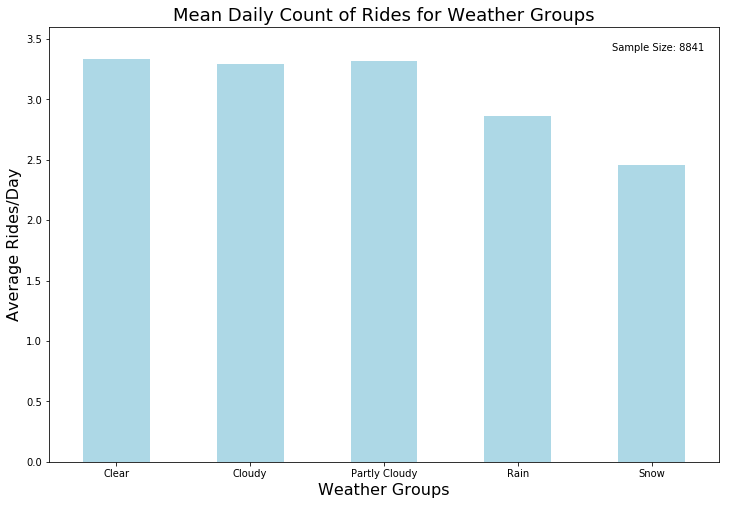

,Weather Group,Average Rides/Day,precipIntensity,precipProbability,temperature,apparentTemperature,windSpeed
0,Clear,3.332031,0.000014,0.002103,47.783541,46.482242,2.788297
1,Cloudy,3.295107,0.000276,0.035127,43.312801,40.958697,4.235133
2,Partly Cloudy,3.319271,0.000067,0.008053,52.049260,50.752806,3.627671
3,Rain,2.865471,0.031674,0.707580,55.039343,54.140308,3.919190
4,Snow,2.454545,0.006259,0.469333,33.018848,29.398788,4.839939


In [9]:
# Calculate the average values on a daily basis for each Weather Group to normalize data
df_WeatherSummary = df_WeatherGrouped.groupby('Weather Group', as_index=False).mean()
df_WeatherSummary = df_WeatherSummary.rename(columns = {'Ride Count': 'Average Rides/Day'})

# Create bar chart and save png file
df_WeatherSummary.plot(kind='bar', y = 'Average Rides/Day', x = 'Weather Group', legend=False, rot = 0, 
                       color='lightblue', figsize=(12,8), ylim=(0,3.6))

plt.title('Mean Daily Count of Rides for Weather Groups', fontsize=18)
plt.text(3.7, 3.4, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Weather Groups', fontsize=16)

try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-WeatherGroups.png")

plt.show()
df_WeatherSummary

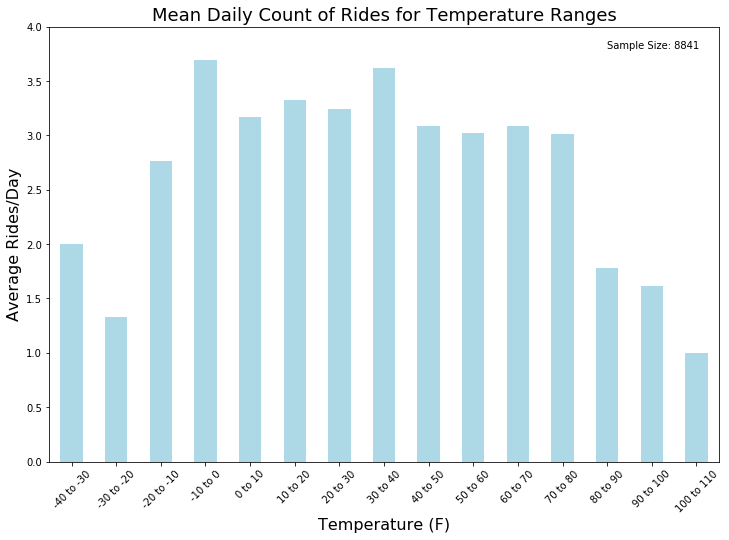

,Average Rides/Day
Temp Range,
-40 to -30,2.000000
-30 to -20,1.333333
-20 to -10,2.764706
-10 to 0,3.693878
0 to 10,3.164948
10 to 20,3.329670
20 to 30,3.245552
30 to 40,3.619048
40 to 50,3.082645


In [10]:
# Create Temperature bins in 10F increments including minimum and maximum temperatures observed
tbins = np.arange(int(min(df_merged['apparentTemperature'])/10-1)*10, 
                  int(max(df_merged['apparentTemperature'])/10+2)*10, 10)

# Create bin labels
tbin_names = [f"{tbins[i]} to {tbins[i+1]}" for i in range(len(tbins)-1)]
    
# Calculate average daily number of rides per temperature bin
df_TempRides = df_merged
df_TempRides['Temp Range'] = pd.cut(df_merged['apparentTemperature'], tbins, labels=tbin_names)
df_TempRides = df_TempRides.groupby(['Temp Range', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_TempRides = df_TempRides.groupby('Temp Range').mean()
df_TempRides = df_TempRides.rename(columns = {'Trip ID':'Average Rides/Day'})

# Create bar chart and save png file
df_TempRides.plot(kind='bar', y = 'Average Rides/Day', legend=False, rot = 45, 
                  color='lightblue', figsize=(12,8), ylim=(0,4))

plt.title('Mean Daily Count of Rides for Temperature Ranges', fontsize=18)
plt.text(12, 3.8, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Temperature (F)', fontsize=16)

try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-Temp.png")

plt.show()
df_TempRides

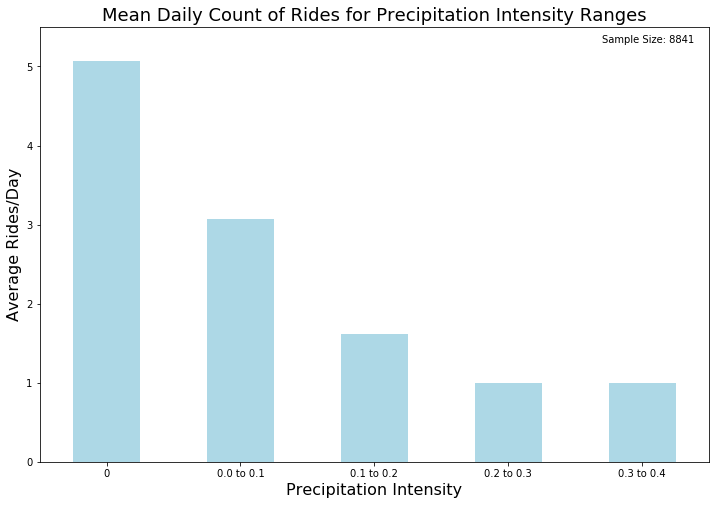

,Average Rides/Day
Precipitation,
0,5.072944
0.0 to 0.1,3.070081
0.1 to 0.2,1.612903
0.2 to 0.3,1.000000
0.3 to 0.4,1.000000


In [11]:
# create precipitation bins and labels
precipitation_bins = np.arange(int(min(df_merged['precipIntensity'])/0.1-1)*0.1, 
                               int(max(df_merged['precipIntensity'])/0.1+2)*0.1, 0.1)
pr_names = [f"{precipitation_bins[i]:.2} to {precipitation_bins[i+1]:.2}" for i in range(len(precipitation_bins)-1)]
pr_names[0]=0

# Calculate average daily number of rides per precipitation bin
df_PreRides = df_merged
df_PreRides['Precipitation'] = pd.cut(df_merged['precipIntensity'], precipitation_bins, labels=pr_names)
df_PreRides = df_PreRides.groupby(['Precipitation', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_PreRides = df_PreRides.groupby('Precipitation').mean()
df_PreRides = df_PreRides.rename(columns = {'Trip ID':'Average Rides/Day'})


# Create bar chart and save png file
df_PreRides.plot(kind='bar', y = 'Average Rides/Day', legend=False, rot = 0, 
                 color='lightblue', figsize=(12,8), ylim=(0,5.5))

plt.title('Mean Daily Count of Rides for Precipitation Intensity Ranges', fontsize=18)
plt.text(3.7, 5.3, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Precipitation Intensity', fontsize=16)

try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-Precipitation.png")

plt.show()
df_PreRides

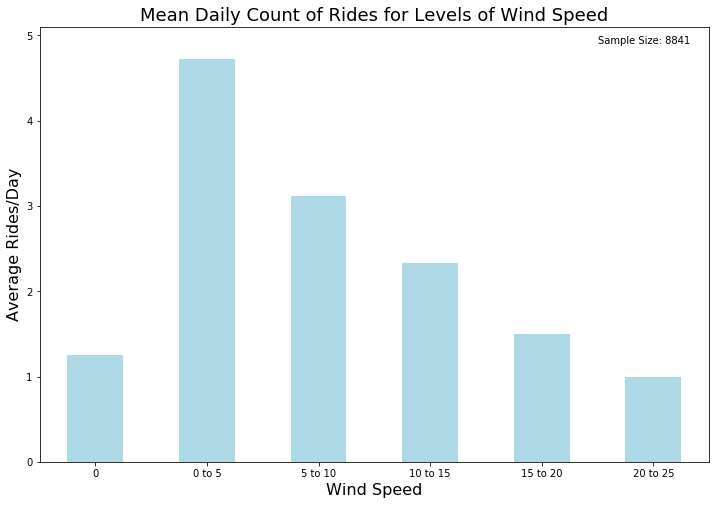

,Average Rides/Day
Winds,
0,1.250000
0 to 5,4.718341
5 to 10,3.118065
10 to 15,2.333333
15 to 20,1.500000
20 to 25,1.000000


In [12]:
# create wind bins and labels
wind_bins = np.arange(int(min(df_merged['windSpeed'])/5-1)*5, 
                      int(max(df_merged['windSpeed'])/5+2)*5, 5)

wind_names = [f"{wind_bins[i]} to {wind_bins[i+1]}" for i in range(len(wind_bins)-1)]
wind_names[0] = 0
    
# Calculate average daily number of rides per wind bin
df_WindRides = df_merged
df_WindRides['Winds'] = pd.cut(df_merged['windSpeed'], wind_bins, labels=wind_names)
df_WindRides = df_WindRides.groupby(['Winds', 'Date'], as_index=False).agg({'Trip ID': 'count'})
df_WindRides = df_WindRides.groupby('Winds').mean()
df_WindRides = df_WindRides.rename(columns = {'Trip ID':'Average Rides/Day'})

# Create bar chart and save png file
df_WindRides.plot(kind='bar', y = 'Average Rides/Day', legend=False, rot = 0, 
                  color='lightblue', figsize=(12,8), ylim=(0,5.1))

plt.title('Mean Daily Count of Rides for Levels of Wind Speed', fontsize=18)
plt.text(4.5,4.9, f'Sample Size: {totalrides}')
plt.ylabel('Average Rides/Day', fontsize=16)
plt.xlabel('Wind Speed', fontsize=16)


try: os.mkdir('Images')
except: pass
plt.savefig("Images/Rides-Wind.png")

plt.show()
df_WindRides

## Jared's Work